# BACKORDER DETECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv("Kaggle_Training_Dataset_v2.csv")
df_train.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


`national_inv`: The current inventory level of the item across the nation.

`lead_time`: The lead time for the item, typically the time it takes from ordering the item to when it is received. A missing value might indicate that the lead time is unknown or variable.

`in_transit_qty`: The quantity of the item that is currently in transit, i.e., shipped but not yet received.

`forecast_3_month`: The forecasted demand for the item over the next 3 months.

`forecast_6_month`: The forecasted demand for the item over the next 6 months.

`forecast_9_month`: The forecasted demand for the item over the next 9 months.

`sales_1_month`: The sales quantity of the item over the past month.

`sales_3_month`: The sales quantity of the item over the past 3 months.

`sales_6_month`: The sales quantity of the item over the past 6 months.

`sales_9_month`: The sales quantity of the item over the past 9 months.

`min_bank`: The minimum recommended quantity of the item that should be kept in inventory to avoid stockouts.

`potential_issue`: A binary indicator (e.g., 0 or 1) showing whether there is a known issue that could affect supply.

`pieces_past_due`: The quantity of the item that is past its due date for delivery.

`perf_6_month_avg`: The supplier's performance rating for the past 6 months, often a percentage or score indicating reliability.

`perf_12_month_avg`: The supplier's performance rating for the past 12 months.

`local_bo_qty`: The quantity of the item currently on backorder locally.

`deck_risk`: A binary indicator showing if there is a risk related to the item being part of a product deck (set of parts).

`oe_constraint`: A binary indicator showing if there are constraints on the original equipment (OE) that might affect supply.

`ppap_risk`: A binary indicator showing if there is a risk associated with the Production Part Approval Process (PPAP), which is used in the automotive supply chain.

`stop_auto_buy`: A binary indicator showing if automatic purchasing of the item has been stopped.

`rev_stop`: A binary indicator showing if there is a revenue stop, meaning sales or production of the item has been halted.

`went_on_backorder`: The target variable, indicating whether the item went on backorder (often binary, e.g., 0 for no and 1 for yes).

In [3]:
df_train.shape

(1687861, 23)

In [4]:
df_test=pd.read_csv("Kaggle_Test_Dataset_v2.csv")
df_test.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [5]:
df_test.shape

(242076, 23)

In [6]:
print("Number of rows in train data : ",df_train.shape[0])
print("Number of rows in test data : ",df_test.shape[0])
print("Number of columns in train data : ",df_train.shape[1])
print("Number of columns in test data : ",df_test.shape[1])

Number of rows in train data :  1687861
Number of rows in test data :  242076
Number of columns in train data :  23
Number of columns in test data :  23


In [7]:
df_train.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_test.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242075,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Removing the last rows of Train as well as Test data which contains Nan For all columns.
df_train.drop(df_train.tail(1).index,inplace=True)
df_test.drop(df_test.tail(1).index,inplace=True)

In [10]:
# Assuming df_train and df_test are your DataFrames
df = pd.concat([df_train, df_test], ignore_index=True)

In [11]:
df.shape

(1929935, 23)

In [12]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.929935e+06,1.814318e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06
mean,4.965683e+02,7.878627e+00,4.306440e+01,1.785399e+02,3.454659e+02,5.066067e+02,5.536816e+01,1.746639e+02,3.415653e+02,5.235771e+02,5.277637e+01,2.016193e+00,-6.899870e+00,-6.462343e+00,6.537039e-01
std,2.957343e+04,7.054212e+00,1.295420e+03,5.108770e+03,9.831562e+03,1.434543e+04,1.884377e+03,5.188856e+03,9.585030e+03,1.473327e+04,1.257968e+03,2.296112e+02,2.659988e+01,2.588343e+01,3.543230e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [13]:
# Using pandas
skewness = df.skew()
print(skewness)

sku                    0.221200
national_inv         340.220722
lead_time              4.556573
in_transit_qty       168.980074
forecast_3_month     142.782763
forecast_6_month     138.817975
forecast_9_month     142.683706
sales_1_month        193.720023
sales_3_month        141.813979
sales_6_month        138.927012
sales_9_month        135.435699
min_bank             130.962612
pieces_past_due      414.269992
perf_6_month_avg      -3.173341
perf_12_month_avg     -3.295184
local_bo_qty         149.620918
dtype: float64


#### `Features are different scales and are right skewed.The difference between the 75th percentile and max value is very high.The 6 months and 12 months performance features have Negative values.`

In [14]:
#Checking for unique rows
print("Number of rows in dataframe df : ",df.shape[0]," and Number of unique IDs in dataframe df : ",len(df.sku.unique()))

Number of rows in dataframe df :  1929935  and Number of unique IDs in dataframe df :  1929935


In [15]:
df.isna().sum()

sku                       0
national_inv              0
lead_time            115617
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [16]:
noCount = df.went_on_backorder.value_counts()[0]
yesCount = df.went_on_backorder.value_counts()[1]
print("Went on backorder = ",yesCount)
print("Not Went on backorder = ",noCount)

Went on backorder =  13981
Not Went on backorder =  1915954


No. of products that did not go for backorder : 99.2755714570698 %
No. of products that did go for backorder : 0.7244285429302023 %


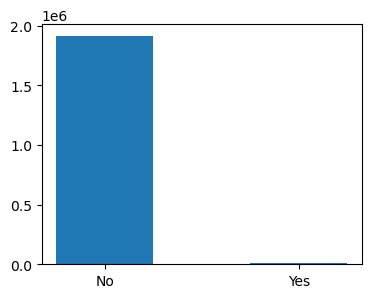

In [17]:
fig = plt.figure() # creates a new figure
axes = fig.add_axes([0,0,0.5,0.5]) #used to add axes to the matplotlib figure
target_values = ['No','Yes'] # storing the target variables in list 
count_data = [noCount,yesCount] # storing the backordered and not backordered count in count_data list
print("No. of products that did not go for backorder :",noCount/len(df.went_on_backorder) * 100,"%") 
print("No. of products that did go for backorder :",yesCount/len(df.went_on_backorder) * 100,"%")
axes.bar(target_values,count_data,width=0.5) # Make a barplot with targetv=_values as x , count_data as height,width=1
plt.show() 

In [18]:
count_values = df.groupby(['rev_stop','went_on_backorder']).size().unstack()

print(count_values)
percentage_of_values = count_values.T.div(count_values.T.sum()).T
 
print(percentage_of_values)

went_on_backorder       No    Yes
rev_stop                         
No                 1915119  13977
Yes                    835      4
went_on_backorder        No       Yes
rev_stop                             
No                 0.992755  0.007245
Yes                0.995232  0.004768


Text(0.5, 1.0, 'bar plots of rev_stop')

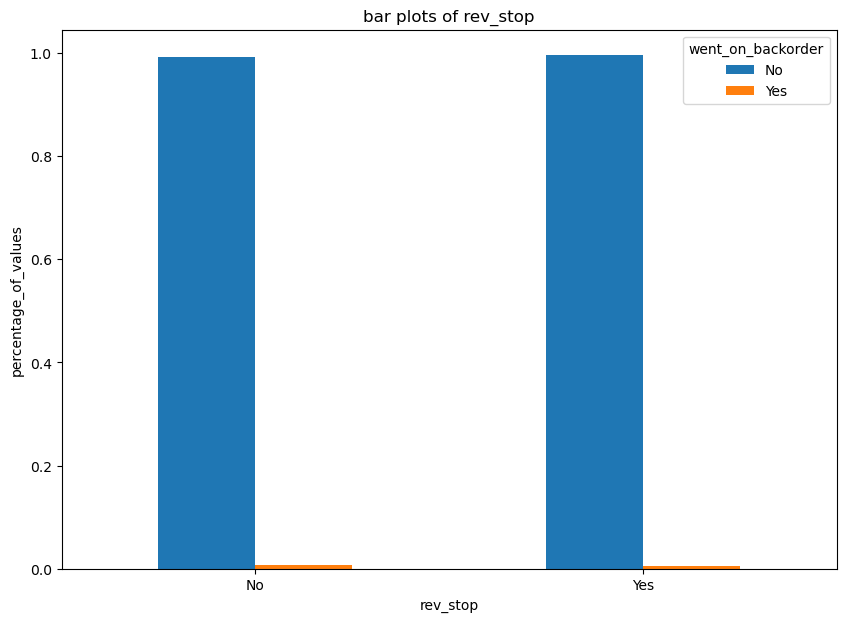

In [19]:
fig,ax = plt.subplots()
percentage_of_values.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('rev_stop')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel("percentage_of_values")
ax.set_title("bar plots of rev_stop")

* When rev_stop is NO ,product did not go to backorder 1278499 times ie 99.11%.
* When rev_stop is NO, product did go to backorder  11584 times ie 0.8979%.
* When rev_stop is YES,product did not go to backorder 562 times ie 99.29%.
* When rev_stop is YES,product did go to backorder 4 times ie 0.7067%.
* When rev_stop is NO ,The Ratio of products that went to backorder is very close to the Class Ratio.
* The value of rev_stop being 0 or 1 , the chances of product going to backorder is extremely low.

went_on_backorder       No    Yes
stop_auto_buy                    
No                   69966    578
Yes                1845988  13403
went_on_backorder        No       Yes
stop_auto_buy                        
No                 0.991807  0.008193
Yes                0.992792  0.007208


Text(0.5, 1.0, 'bar plots of stop_auto_buy')

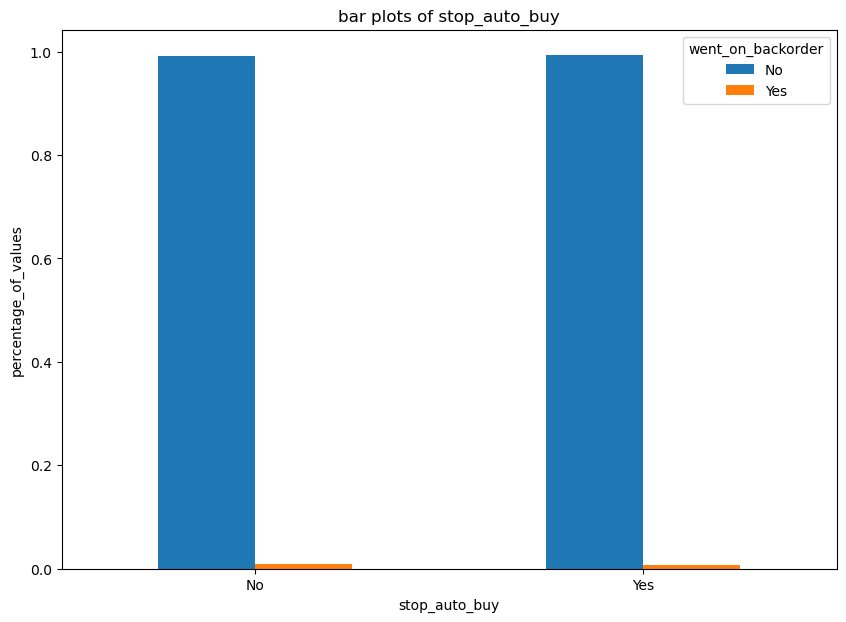

In [20]:
count_values = df.groupby(['stop_auto_buy','went_on_backorder']).size().unstack()

print(count_values)
percentage_of_values = count_values.T.div(count_values.T.sum()).T
 
print(percentage_of_values)

fig,ax = plt.subplots()
percentage_of_values.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('stop_auto_buy')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel("percentage_of_values")
ax.set_title("bar plots of stop_auto_buy")

* When stop_auto_buy is NO ,product did not go to backorder 45936 times ie 99.01%.
* When stop_auto_buy is NO, product did go to backorder  458 times ie 0.9872%.
* When stop_auto_buy is YES,product did not go to backorder 1233125 times ie 99.10%.
* When stop_auto_buy is YES,product did go to backorder 11130 times ie 0.8945%.
* When stop_auto_buy is NO ,The Ratio of products that went to backorder is very close to the Class Ratio.
* The value of stop_auto_buy being 0 or 1 , the chances of product going to backorder is extremely low.

went_on_backorder       No    Yes
deck_risk                        
No                 1482778  11704
Yes                 433176   2277
went_on_backorder        No       Yes
deck_risk                            
No                 0.992169  0.007831
Yes                0.994771  0.005229


Text(0.5, 1.0, 'bar plots of deck_risk')

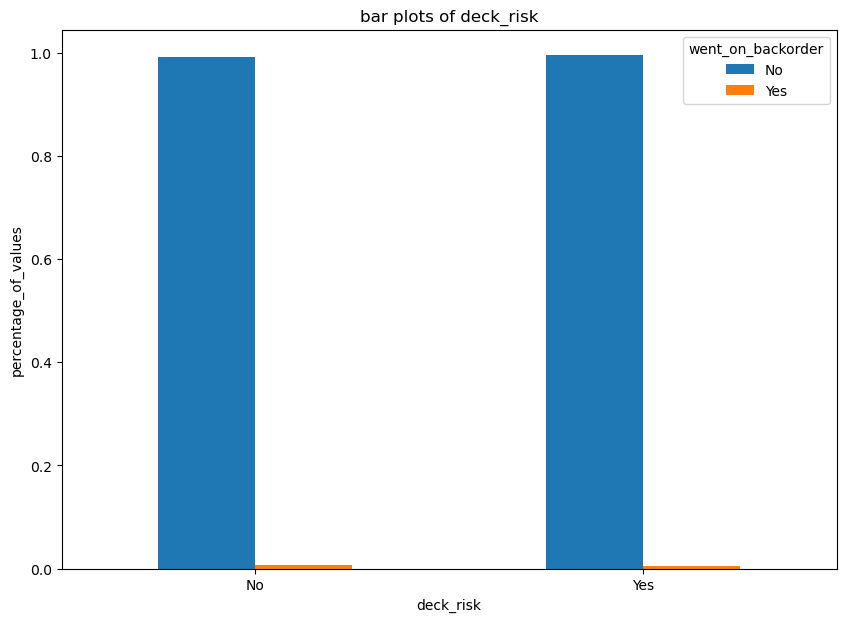

In [21]:
count_values = df.groupby(['deck_risk','went_on_backorder']).size().unstack()

print(count_values)
percentage_of_values = count_values.T.div(count_values.T.sum()).T
 
print(percentage_of_values)

fig,ax = plt.subplots()
percentage_of_values.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('deck_risk')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel("percentage_of_values")
ax.set_title("bar plots of deck_risk")

* When deck_risk is NO ,product did not go to backorder 979987 times ie 99.0223%.
* When deck_risk is NO, product did go to backorder 9676 times ie 0.9777%.
* When deck_risk is YES,product did not go to backorder 299074 times ie 99.3648%.
* When deck_risk is YES,product did go to backorder 1912 times ie 0.6352%

went_on_backorder       No    Yes
ppap_risk                        
No                 1685533  11850
Yes                 230421   2131
went_on_backorder        No       Yes
ppap_risk                            
No                 0.993019  0.006981
Yes                0.990836  0.009164


Text(0.5, 1.0, 'bar plots of ppap_risk')

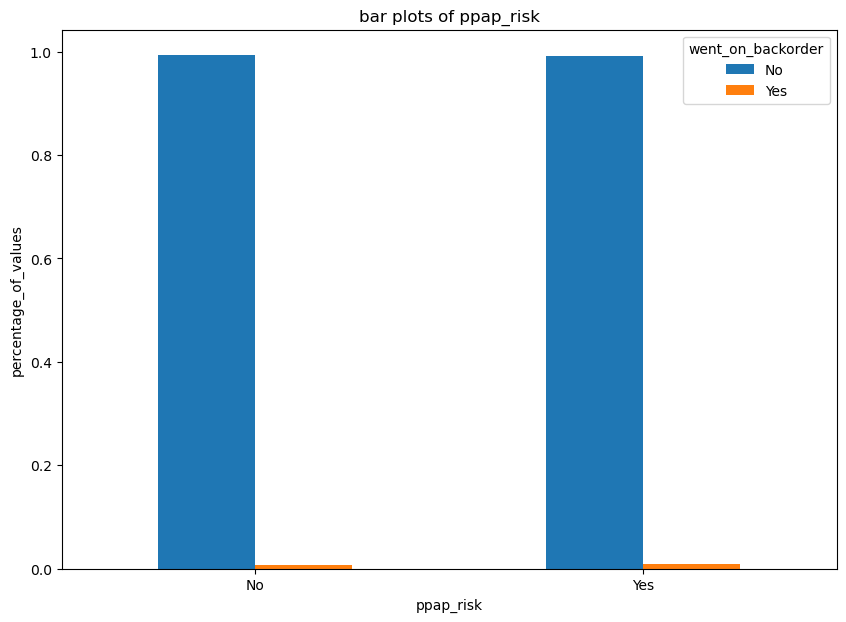

In [22]:
count_values = df.groupby(['ppap_risk','went_on_backorder']).size().unstack()

print(count_values)
percentage_of_values = count_values.T.div(count_values.T.sum()).T
 
print(percentage_of_values)

fig,ax = plt.subplots()
percentage_of_values.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('ppap_risk')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel("percentage_of_values")
ax.set_title("bar plots of ppap_risk")

* When ppap_risk is NO ,product did not go to backorder 1124656 times ie 99.1352%.
* When ppap_risk is NO, product did go to backorder 9811 times ie 0.8648%.
* When ppap_risk is YES,product did not go to backorder 154405 times ie 98.8622%.
* When ppap_risk is YES,product did go to backorder 1777 times ie 0.11378%

went_on_backorder       No    Yes
oe_constraint                    
No                 1915671  13972
Yes                    283      9
went_on_backorder        No       Yes
oe_constraint                        
No                 0.992759  0.007241
Yes                0.969178  0.030822


Text(0.5, 1.0, 'bar plots of oe_constraint')

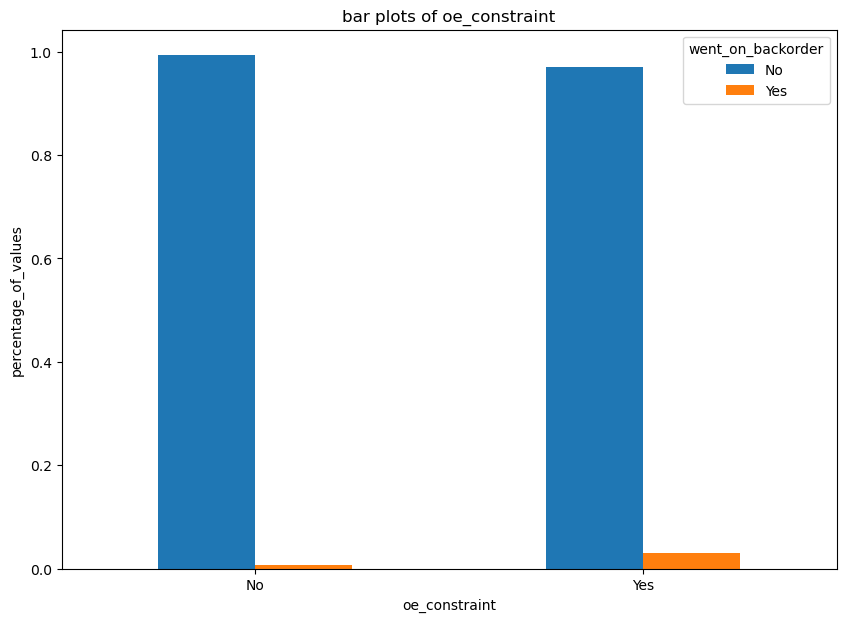

In [23]:
count_values = df.groupby(['oe_constraint','went_on_backorder']).size().unstack()

print(count_values)
percentage_of_values = count_values.T.div(count_values.T.sum()).T
 
print(percentage_of_values)

fig,ax = plt.subplots()
percentage_of_values.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('oe_constraint')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel("percentage_of_values")
ax.set_title("bar plots of oe_constraint")

* When oe_constraint is NO ,product did not go to backorder 1278864 times ie 99.1027%.
* When oe_constraint is NO, product did go to backorder 11579 times ie 0.8973%.
* When oe_constraint is YES,product did not go to backorder 197 times ie 95.6311%.
* When oe_constraint is YES,product did go to backorder 9 times ie 4.3689%

went_on_backorder       No    Yes
potential_issue                  
No                 1915019  13927
Yes                    935     54
went_on_backorder        No       Yes
potential_issue                      
No                 0.992780  0.007220
Yes                0.945399  0.054601


Text(0.5, 1.0, 'bar plots of potential_issue')

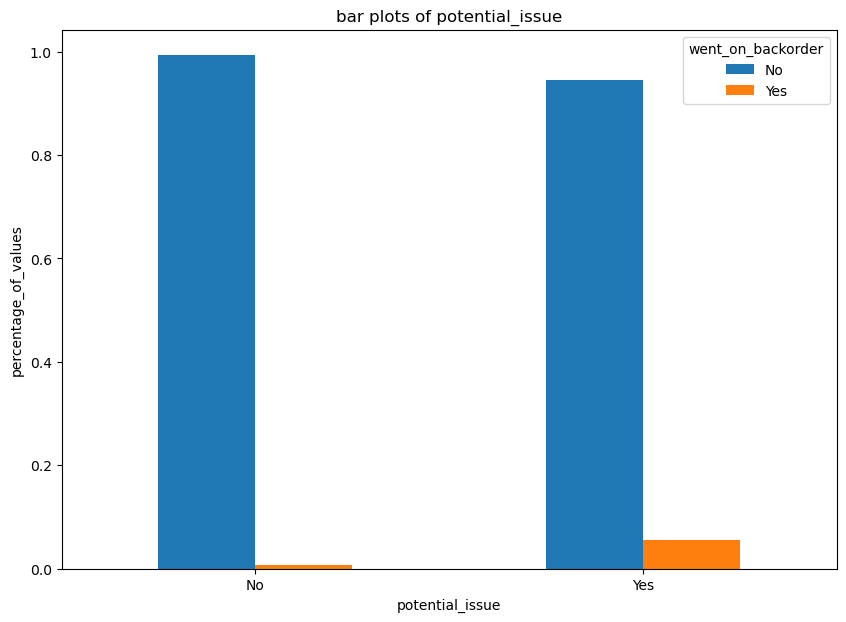

In [24]:
count_values = df.groupby(['potential_issue','went_on_backorder']).size().unstack()

print(count_values)
percentage_of_values = count_values.T.div(count_values.T.sum()).T
 
print(percentage_of_values)

fig,ax = plt.subplots()
percentage_of_values.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('potential_issue')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel("percentage_of_values")
ax.set_title("bar plots of potential_issue")

* When potential_issue is NO ,product did not go to backorder 1278349 times ie 99.1049%.
* When potential_issue is NO, product did go to backorder 11546 times ie 0.8951%.
* When potential_issue is YES,product did not go to backorder 712 times ie 94.4297%.
* When potential_issue is YES,product did go to backorder 42 times ie 5.5703%

<Axes: xlabel='went_on_backorder', ylabel='national_inv'>

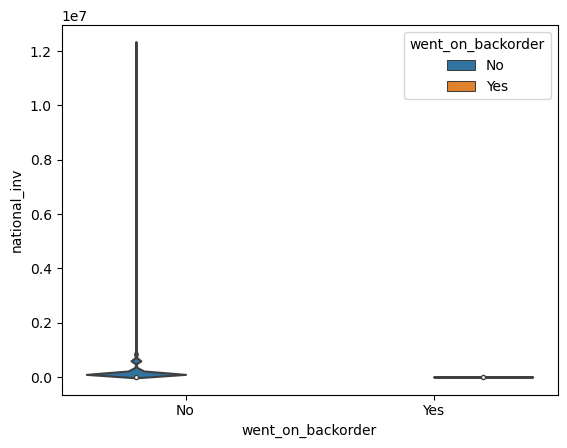

In [25]:
sns.violinplot(x = 'went_on_backorder',y = 'national_inv' ,hue = 'went_on_backorder', data = df,size=15)

In [26]:
Q1_national_inv = df.national_inv.quantile(0.25) # Storing the 25th percentile value
Q3_national_inv = df.national_inv.quantile(0.75) # Storing the 75 th percentile value

IQR_national_inv = Q3_national_inv - Q1_national_inv  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_national_inv = Q1_national_inv - 1.5*IQR_national_inv 
upper_bound_national_inv = Q3_national_inv + 1.5*IQR_national_inv

<Axes: xlabel='went_on_backorder', ylabel='national_inv'>

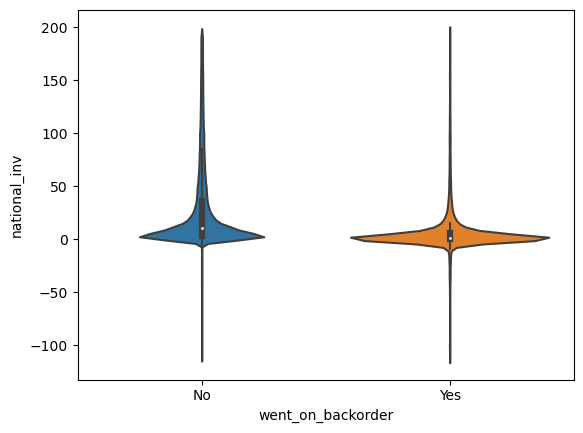

In [27]:
range_national_inv = (df.national_inv >= lower_bound_national_inv) & (df.national_inv <= upper_bound_national_inv) # Range of Data
sns.violinplot(x = 'went_on_backorder',y = 'national_inv' , data = df.loc[range_national_inv],size=15)

In [28]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.national_inv.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.national_inv.quantile(i*0.01))
print("="*100)
print("Between 0-10 th percentile")
for i in range(0,10,1):
    print(i,"percentile of value is ",df.national_inv.quantile(i*0.01))

0 percentile of values is  -27256.0
10 percentile of values is  1.0
20 percentile of values is  3.0
30 percentile of values is  6.0
40 percentile of values is  10.0
50 percentile of values is  15.0
60 percentile of values is  27.0
70 percentile of values is  55.0
80 percentile of values is  119.0
90 percentile of values is  360.0
100 percentile of values is  12334404.0
Between 90-100 percentile
90 percentile of values is  360.0
91 percentile of values is  417.0
92 percentile of values is  490.0
93 percentile of values is  577.0
94 percentile of values is  722.0
95 percentile of values is  924.0
96 percentile of values is  1225.0
97 percentile of values is  1821.0
98 percentile of values is  3015.0
99 percentile of values is  5487.0
100 percentile of values is  12334404.0
Between 0-10 th percentile
0 percentile of value is  -27256.0
1 percentile of value is  0.0
2 percentile of value is  0.0
3 percentile of value is  0.0
4 percentile of value is  0.0
5 percentile of value is  0.0
6 perc

<Axes: xlabel='went_on_backorder', ylabel='in_transit_qty'>

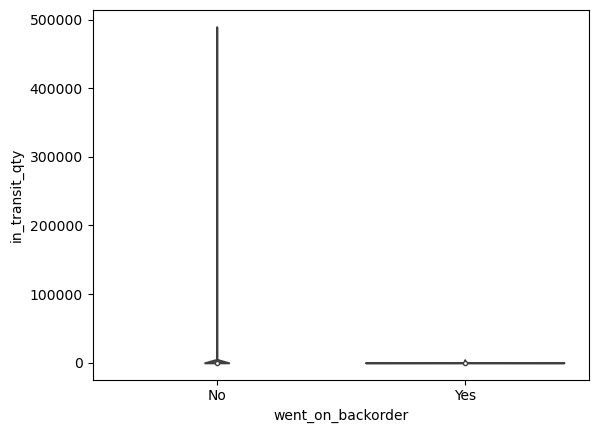

In [29]:
sns.violinplot(x = 'went_on_backorder',y = 'in_transit_qty' , data = df,size=15)

In [30]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.in_transit_qty.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.in_transit_qty.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  0.0
70 percentile of values is  0.0
80 percentile of values is  1.0
90 percentile of values is  15.0
100 percentile of values is  489408.0
Between 90-100 percentile
90 percentile of values is  15.0
91 percentile of values is  20.0
92 percentile of values is  26.0
93 percentile of values is  35.0
94 percentile of values is  48.0
95 percentile of values is  66.0
96 percentile of values is  96.0
97 percentile of values is  145.0
98 percentile of values is  250.0
99 percentile of values is  565.0
100 percentile of values is  489408.0


In [31]:
for i in np.arange(0.0,1.0,0.1):
    val = df['in_transit_qty'].values
    val = np.sort(val,axis=None)
    print("{} percentile value is {} ".format(99+i,val[int(len(val)*(float(99+i)/100))]))
print("100 percentile value is ",val[-1])

99.0 percentile value is 565.0 
99.1 percentile value is 630.0 
99.2 percentile value is 720.0 
99.3 percentile value is 830.0 
99.4 percentile value is 990.0 
99.5 percentile value is 1193.0 
99.6 percentile value is 1500.0 
99.7 percentile value is 2040.0 
99.8 percentile value is 3000.0 
99.9 percentile value is 5510.0 
100 percentile value is  489408.0


In [32]:
Q1_in_transit_qty = df.in_transit_qty.quantile(0) # Storing the 0.0th percentile value
Q3_in_transit_qty = df.in_transit_qty.quantile(0.99) # Storing the 99.9 th percentile value

IQR_in_transit_qty = Q3_in_transit_qty - Q1_in_transit_qty  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_in_transit_qty = Q1_in_transit_qty# - 1.5*IQR_in_transit_qty 
upper_bound_in_transit_qty = Q3_in_transit_qty #+ 1.5*IQR_in_transit_qty

<Axes: xlabel='went_on_backorder', ylabel='in_transit_qty'>

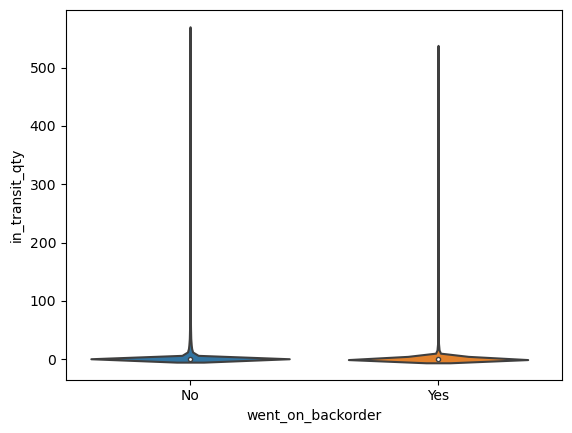

In [33]:
range_inTransitQty = (df.in_transit_qty >= lower_bound_in_transit_qty) & (df.in_transit_qty <= upper_bound_in_transit_qty) # Range of Data
sns.violinplot(x = 'went_on_backorder',y = 'in_transit_qty' , data = df.loc[range_inTransitQty],showfliers=False)

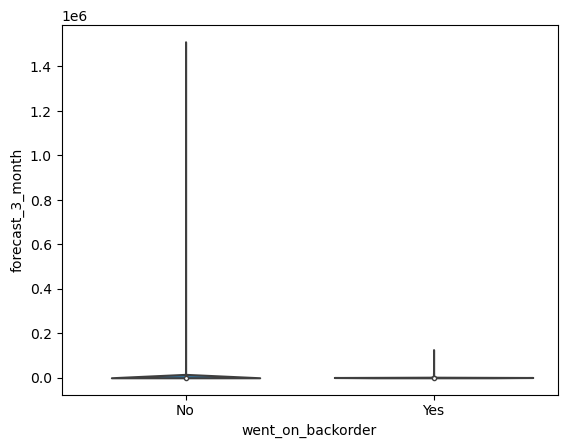

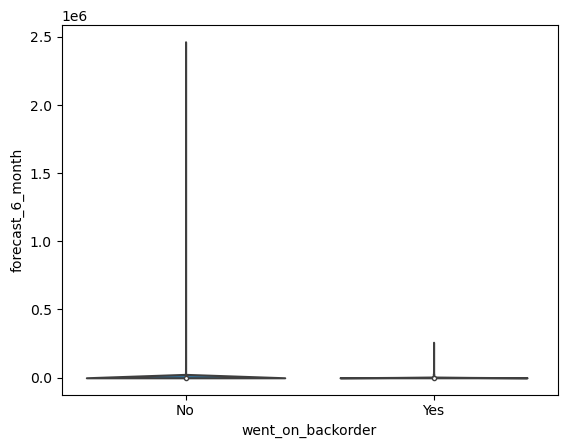

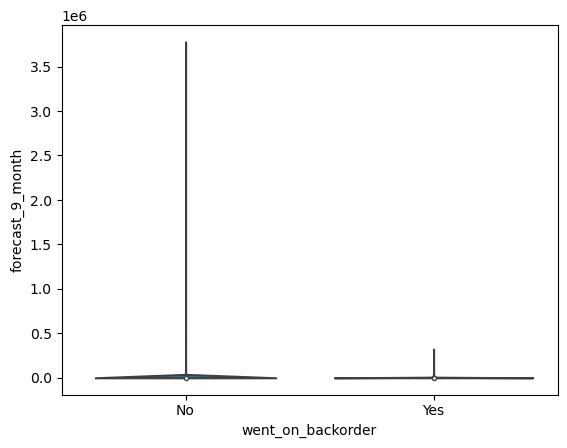

In [34]:
sns.violinplot(x=df['went_on_backorder'],y = df['forecast_3_month'],showfliers=False)
plt.show()

sns.violinplot(x=df['went_on_backorder'],y = df['forecast_6_month'],showfliers=False)
plt.show()

sns.violinplot(x=df['went_on_backorder'],y = df['forecast_9_month'],showfliers=False)
plt.show()

In [35]:
# Percentiles for Forecast_3_months
for i in range(0,110,10):
    print(i,"percentile of values is ",df.forecast_3_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.forecast_3_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  0.0
70 percentile of values is  1.0
80 percentile of values is  12.0
90 percentile of values is  83.0
100 percentile of values is  1510592.0
Between 90-100 percentile
90 percentile of values is  83.0
91 percentile of values is  100.0
92 percentile of values is  131.0
93 percentile of values is  172.0
94 percentile of values is  224.0
95 percentile of values is  300.0
96 percentile of values is  425.0
97 percentile of values is  630.0
98 percentile of values is  1042.3200000000652
99 percentile of values is  2280.0
100 percentile of values is  1510592.0


In [36]:
# Percentiles for Forecast_6_months
for i in range(0,110,10):
    print(i,"percentile of values is ",df.forecast_6_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.forecast_6_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  0.0
70 percentile of values is  5.0
80 percentile of values is  30.0
90 percentile of values is  176.0
100 percentile of values is  2461360.0
Between 90-100 percentile
90 percentile of values is  176.0
91 percentile of values is  214.0
92 percentile of values is  270.0
93 percentile of values is  345.0
94 percentile of values is  450.0
95 percentile of values is  600.0
96 percentile of values is  840.0
97 percentile of values is  1213.0
98 percentile of values is  2000.0
99 percentile of values is  4335.659999999916
100 percentile of values is  2461360.0


In [37]:
# Percentiles for Forecast_9_months
for i in range(0,110,10):
    print(i,"percentile of values is ",df.forecast_9_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.forecast_9_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  0.0
70 percentile of values is  8.0
80 percentile of values is  48.0
90 percentile of values is  262.0
100 percentile of values is  3777304.0
Between 90-100 percentile
90 percentile of values is  262.0
91 percentile of values is  323.0
92 percentile of values is  403.0
93 percentile of values is  505.0
94 percentile of values is  665.0
95 percentile of values is  896.0
96 percentile of values is  1224.0
97 percentile of values is  1809.0
98 percentile of values is  3000.0
99 percentile of values is  6316.0
100 percentile of values is  3777304.0


In [38]:
Q1_forecast_3_month = df.forecast_3_month.quantile(0.25) # Storing the 25th percentile value
Q3_forecast_3_month = df.forecast_3_month.quantile(0.75) # Storing the 75 th percentile value

IQR_forecast_3_month = Q3_forecast_3_month - Q1_forecast_3_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_forecast_3_month = Q1_forecast_3_month - 1.5*IQR_forecast_3_month 
upper_bound_forecast_3_month = Q3_forecast_3_month + 1.5*IQR_forecast_3_month

Q1_forecast_6_month = df.forecast_6_month.quantile(0.25) # Storing the 25th percentile value
Q3_forecast_6_month = df.forecast_6_month.quantile(0.75) # Storing the 75 th percentile value

IQR_forecast_6_month = Q3_forecast_6_month - Q1_forecast_6_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_forecast_6_month = Q1_forecast_6_month - 1.5*IQR_forecast_6_month 
upper_bound_forecast_6_month = Q3_forecast_6_month + 1.5*IQR_forecast_6_month

Q1_forecast_9_month = df.forecast_9_month.quantile(0.25) # Storing the 25th percentile value
Q3_forecast_9_month = df.forecast_9_month.quantile(0.75) # Storing the 75 th percentile value

IQR_forecast_9_month = Q3_forecast_9_month - Q1_forecast_9_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_forecast_9_month = Q1_forecast_9_month - 1.5*IQR_forecast_9_month 
upper_bound_forecast_9_month = Q3_forecast_9_month + 1.5*IQR_forecast_9_month

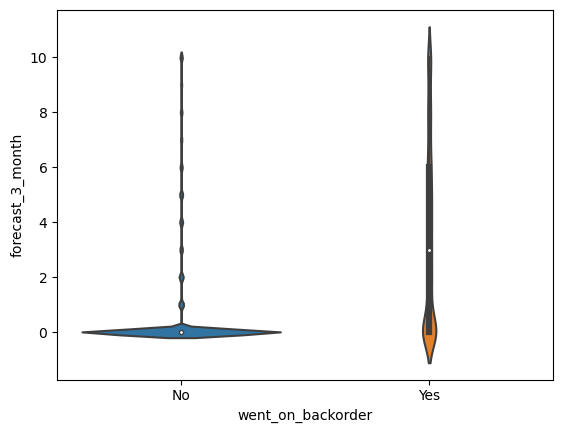

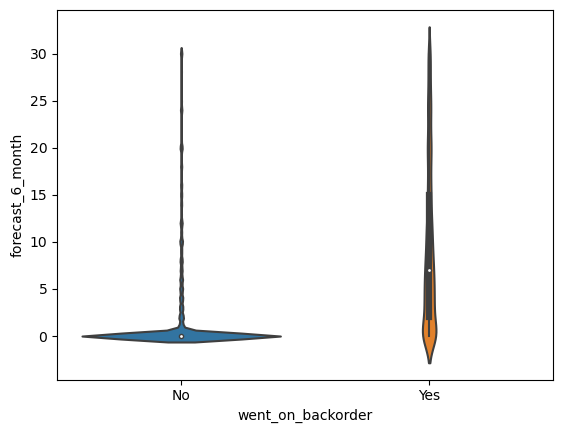

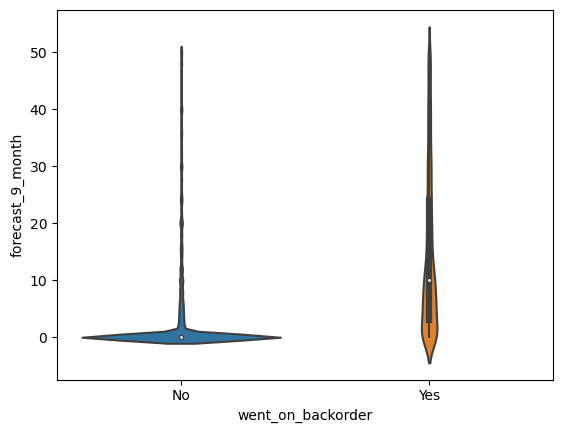

In [39]:
range_forecast_3_months = (df.forecast_3_month >= lower_bound_forecast_3_month) & (df.forecast_3_month <= upper_bound_forecast_3_month) # Range of Data
sns.violinplot(x = 'went_on_backorder',y = 'forecast_3_month',data = df.loc[range_forecast_3_months])
plt.show()

range_forecast_6_months = (df.forecast_6_month >= lower_bound_forecast_6_month) & (df.forecast_6_month <= upper_bound_forecast_6_month) # Range of Data
sns.violinplot(x = 'went_on_backorder',y = 'forecast_6_month',data = df.loc[range_forecast_6_months])
plt.show()

range_forecast_9_months = (df.forecast_9_month >= lower_bound_forecast_9_month) & (df.forecast_9_month <= upper_bound_forecast_9_month) # Range of Data
sns.violinplot(x = 'went_on_backorder',y = 'forecast_9_month',data = df.loc[range_forecast_9_months])
plt.show()

<Axes: xlabel='went_on_backorder', ylabel='lead_time'>

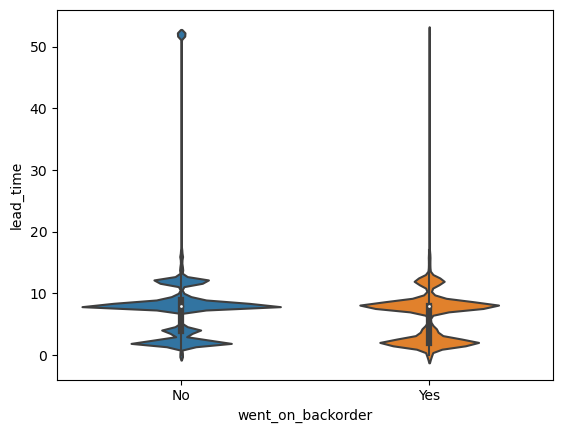

In [40]:
sns.violinplot(x=df['went_on_backorder'],y = df['lead_time'])

In [41]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.lead_time.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.lead_time.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  2.0
20 percentile of values is  2.0
30 percentile of values is  4.0
40 percentile of values is  8.0
50 percentile of values is  8.0
60 percentile of values is  8.0
70 percentile of values is  8.0
80 percentile of values is  9.0
90 percentile of values is  12.0
100 percentile of values is  52.0
Between 90-100 percentile
90 percentile of values is  12.0
91 percentile of values is  12.0
92 percentile of values is  12.0
93 percentile of values is  12.0
94 percentile of values is  12.0
95 percentile of values is  12.0
96 percentile of values is  13.0
97 percentile of values is  15.0
98 percentile of values is  17.0
99 percentile of values is  52.0
100 percentile of values is  52.0


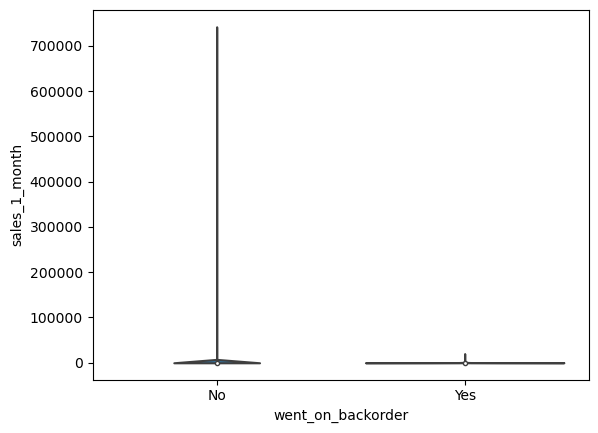

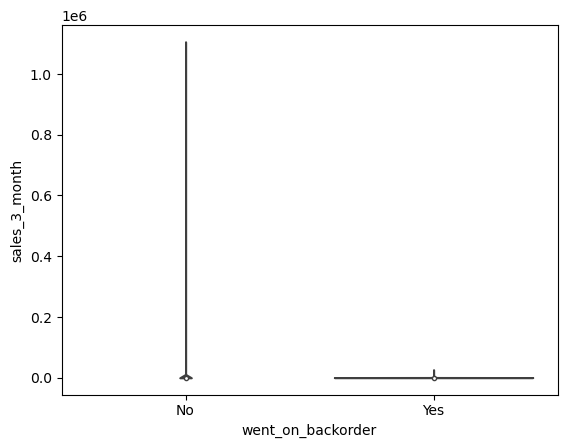

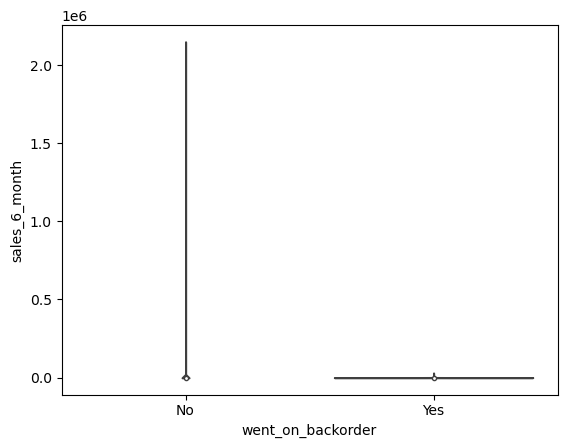

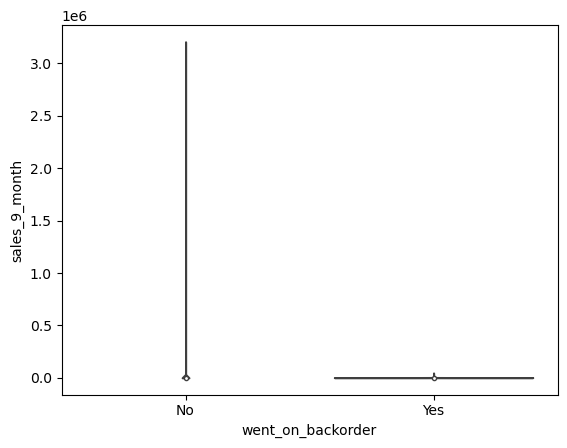

In [42]:
sns.violinplot(x=df['went_on_backorder'],y = df['sales_1_month'])
plt.show()

sns.violinplot(x=df['went_on_backorder'],y = df['sales_3_month'])
plt.show()

sns.violinplot(x=df['went_on_backorder'],y = df['sales_6_month'])
plt.show()

sns.violinplot(x=df['went_on_backorder'],y = df['sales_9_month'])
plt.show()

### Percentile sales for 1 month

In [43]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.sales_1_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.sales_1_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  1.0
70 percentile of values is  2.0
80 percentile of values is  8.0
90 percentile of values is  34.0
100 percentile of values is  741774.0
Between 90-100 percentile
90 percentile of values is  34.0
91 percentile of values is  41.0
92 percentile of values is  50.0
93 percentile of values is  63.0
94 percentile of values is  81.0
95 percentile of values is  106.0
96 percentile of values is  146.0
97 percentile of values is  211.0
98 percentile of values is  336.0
99 percentile of values is  693.0
100 percentile of values is  741774.0


### Percentile sales of 3 month

In [44]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.sales_3_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.sales_3_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  1.0
60 percentile of values is  3.0
70 percentile of values is  9.0
80 percentile of values is  26.0
90 percentile of values is  113.0
100 percentile of values is  1105478.0
Between 90-100 percentile
90 percentile of values is  113.0
91 percentile of values is  137.0
92 percentile of values is  168.0
93 percentile of values is  209.0
94 percentile of values is  267.0
95 percentile of values is  349.0
96 percentile of values is  479.0
97 percentile of values is  688.0
98 percentile of values is  1087.0
99 percentile of values is  2229.0
100 percentile of values is  1105478.0


### Percentile sales of 6 month

In [45]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.sales_6_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.sales_6_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  1.0
50 percentile of values is  2.0
60 percentile of values is  7.0
70 percentile of values is  18.0
80 percentile of values is  55.0
90 percentile of values is  232.0
100 percentile of values is  2146625.0
Between 90-100 percentile
90 percentile of values is  232.0
91 percentile of values is  280.0
92 percentile of values is  340.0
93 percentile of values is  422.0
94 percentile of values is  535.0
95 percentile of values is  696.0
96 percentile of values is  952.0
97 percentile of values is  1352.0
98 percentile of values is  2153.0
99 percentile of values is  4410.0
100 percentile of values is  2146625.0


In [46]:
### percentile sales of 9 month

In [47]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.sales_9_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.sales_9_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  1.0
50 percentile of values is  4.0
60 percentile of values is  10.0
70 percentile of values is  27.0
80 percentile of values is  84.0
90 percentile of values is  354.0
100 percentile of values is  3205172.0
Between 90-100 percentile
90 percentile of values is  354.0
91 percentile of values is  425.0
92 percentile of values is  517.0
93 percentile of values is  643.0
94 percentile of values is  812.0
95 percentile of values is  1060.0
96 percentile of values is  1451.0
97 percentile of values is  2052.0
98 percentile of values is  3277.0
99 percentile of values is  6698.0
100 percentile of values is  3205172.0


In [48]:
Q1_sales_1_month = df.sales_1_month.quantile(0.25) # Storing the 25th percentile value
Q3_sales_1_month = df.sales_1_month.quantile(0.75) # Storing the 75 th percentile value

IQR_sales_1_month = Q3_sales_1_month - Q1_sales_1_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_sales_1_month = Q1_sales_1_month - 1.5*IQR_sales_1_month 
upper_bound_sales_1_month = Q3_sales_1_month + 1.5*IQR_sales_1_month

Q1_sales_3_month = df.sales_3_month.quantile(0.25) # Storing the 25th percentile value
Q3_sales_3_month = df.sales_3_month.quantile(0.75) # Storing the 75 th percentile value

IQR_sales_3_month = Q3_sales_3_month - Q1_sales_3_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_sales_3_month = Q1_sales_3_month - 1.5*IQR_sales_3_month
upper_bound_sales_3_month = Q3_sales_3_month + 1.5*IQR_sales_3_month

Q1_sales_6_month = df.sales_6_month.quantile(0.25) # Storing the 25th percentile value
Q3_sales_6_month = df.sales_6_month.quantile(0.75) # Storing the 75 th percentile value

IQR_sales_6_month = Q3_sales_6_month - Q1_sales_6_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_sales_6_month = Q1_sales_6_month - 1.5*IQR_sales_6_month
upper_bound_sales_6_month = Q3_sales_6_month + 1.5*IQR_sales_6_month

Q1_sales_9_month = df.sales_9_month.quantile(0.25) # Storing the 25th percentile value
Q3_sales_9_month = df.sales_9_month.quantile(0.75) # Storing the 75 th percentile value

IQR_sales_9_month = Q3_sales_9_month - Q1_sales_9_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_sales_9_month = Q1_sales_9_month - 1.5*IQR_sales_9_month
upper_bound_sales_9_month = Q3_sales_9_month + 1.5*IQR_sales_9_month

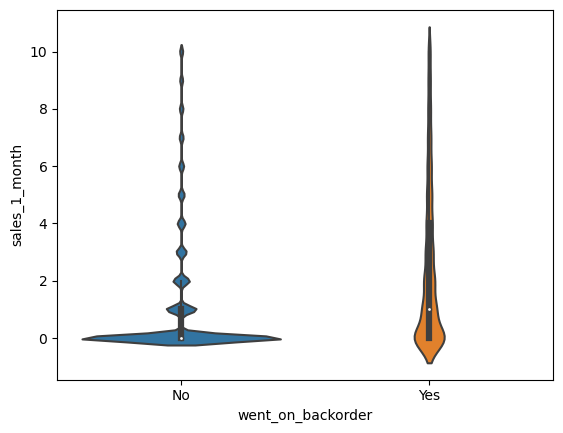

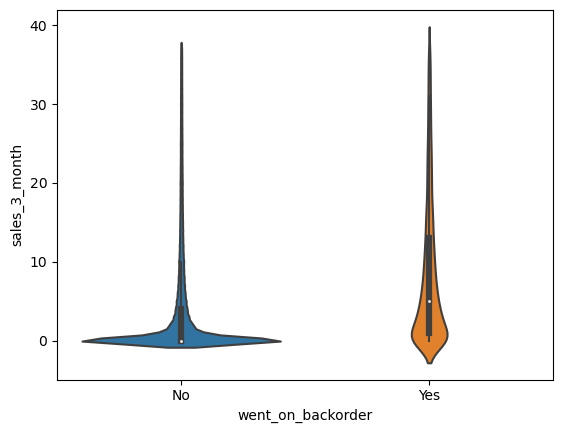

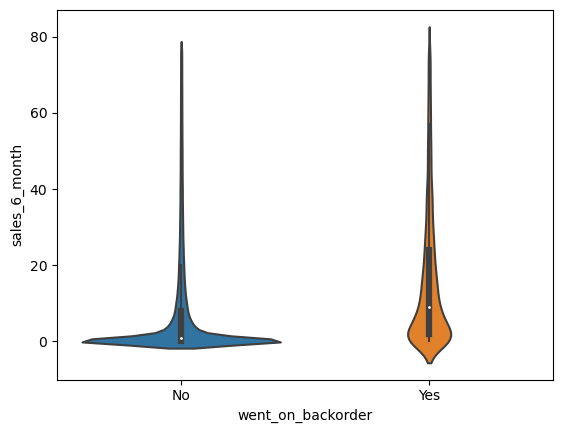

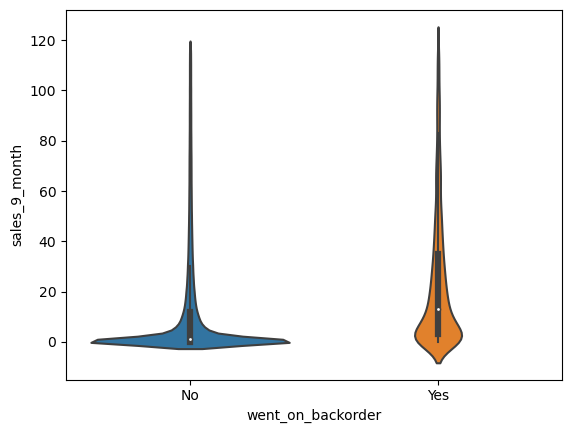

In [49]:
range_sales_1_month = (df.sales_1_month >= lower_bound_sales_1_month) & (df.sales_1_month <= upper_bound_sales_1_month)
sns.violinplot(x = 'went_on_backorder',y = 'sales_1_month',data = df.loc[range_sales_1_month])
plt.show()

range_sales_3_month = (df.sales_3_month >= lower_bound_sales_3_month) & (df.sales_3_month <= upper_bound_sales_3_month)
sns.violinplot(x = 'went_on_backorder',y = 'sales_3_month',data = df.loc[range_sales_3_month])
plt.show()

range_sales_6_month = (df.sales_6_month >= lower_bound_sales_6_month) & (df.sales_6_month <= upper_bound_sales_6_month)
sns.violinplot(x = 'went_on_backorder',y = 'sales_6_month',data = df.loc[range_sales_6_month])
plt.show()

range_sales_9_month = (df.sales_9_month >= lower_bound_sales_9_month) & (df.sales_9_month <= upper_bound_sales_9_month)
sns.violinplot(x = 'went_on_backorder',y = 'sales_9_month',data = df.loc[range_sales_9_month])
plt.show()

<Axes: xlabel='went_on_backorder', ylabel='pieces_past_due'>

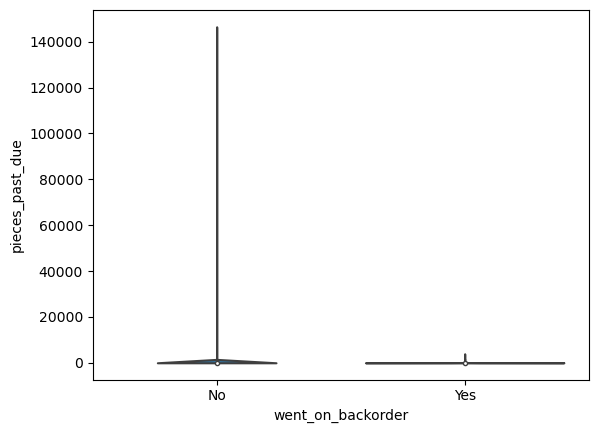

In [50]:
sns.violinplot(x=df['went_on_backorder'],y = df['pieces_past_due'])

In [51]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.pieces_past_due.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.pieces_past_due.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  0.0
70 percentile of values is  0.0
80 percentile of values is  0.0
90 percentile of values is  0.0
100 percentile of values is  146496.0
Between 90-100 percentile
90 percentile of values is  0.0
91 percentile of values is  0.0
92 percentile of values is  0.0
93 percentile of values is  0.0
94 percentile of values is  0.0
95 percentile of values is  0.0
96 percentile of values is  0.0
97 percentile of values is  0.0
98 percentile of values is  0.0
99 percentile of values is  4.0
100 percentile of values is  146496.0


<Axes: xlabel='went_on_backorder', ylabel='min_bank'>

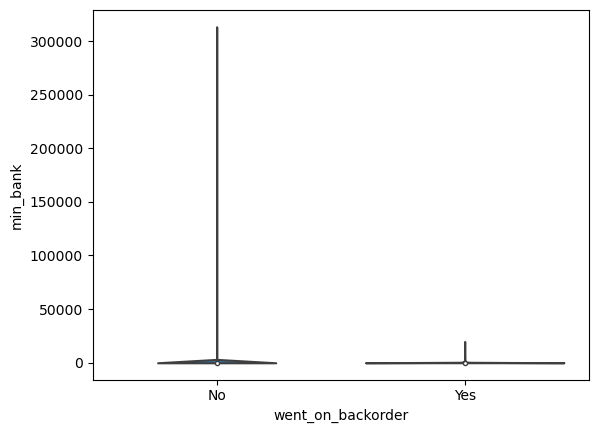

In [52]:
sns.violinplot(x=df['went_on_backorder'],y = df['min_bank'])

In [53]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.min_bank.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.min_bank.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  1.0
70 percentile of values is  2.0
80 percentile of values is  10.0
90 percentile of values is  46.0
100 percentile of values is  313319.0
Between 90-100 percentile
90 percentile of values is  46.0
91 percentile of values is  54.0
92 percentile of values is  64.0
93 percentile of values is  78.0
94 percentile of values is  97.0
95 percentile of values is  125.0
96 percentile of values is  165.0
97 percentile of values is  226.0
98 percentile of values is  340.0
99 percentile of values is  679.6599999999162
100 percentile of values is  313319.0


In [54]:
Q1_min_bank = df.min_bank.quantile(0.25) # Storing the 25th percentile value
Q3_min_bank = df.min_bank.quantile(0.75) # Storing the 75 th percentile value

IQR_min_bank = Q3_min_bank - Q1_min_bank  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_min_bank = Q1_min_bank - 1.5*IQR_min_bank
upper_bound_min_bank = Q3_min_bank + 1.5*IQR_min_bank

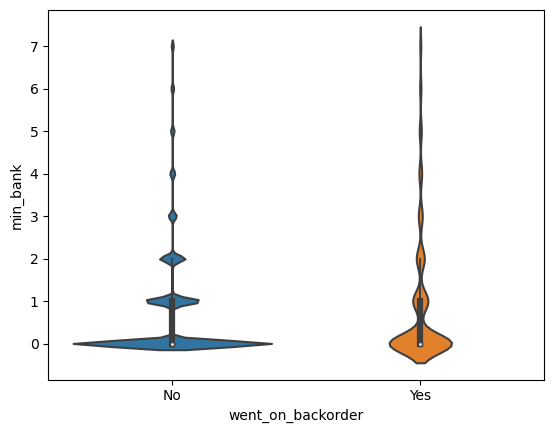

In [55]:
range_min_bank = (df.min_bank >= lower_bound_min_bank) & (df.min_bank <= upper_bound_min_bank)
sns.violinplot(x = 'went_on_backorder',y = 'min_bank',data = df.loc[range_min_bank],showfliers = False)
plt.show()

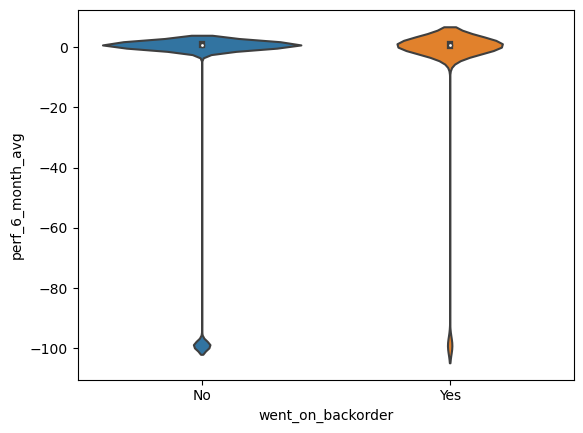

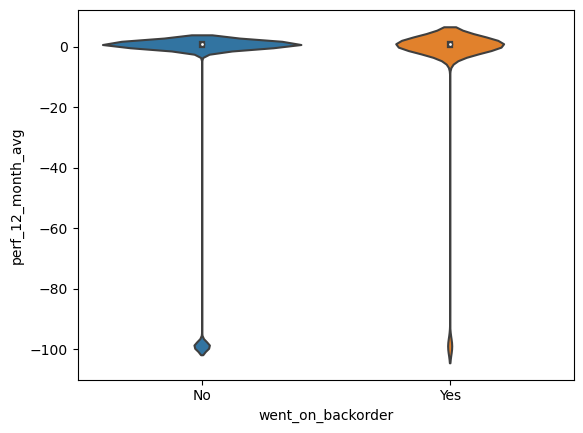

In [56]:
sns.violinplot(x=df['went_on_backorder'],y = df['perf_6_month_avg'])
plt.show()

sns.violinplot(x=df['went_on_backorder'],y = df['perf_12_month_avg'])
plt.show()

In [57]:
Q1_local_bo_qty = df.local_bo_qty.quantile(0.25) # Storing the 25th percentile value
Q3_local_bo_qty = df.local_bo_qty.quantile(0.75) # Storing the 75 th percentile value

IQR_local_bo_qty = Q3_local_bo_qty - Q1_local_bo_qty  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound = Q1_local_bo_qty - 1.5*IQR_local_bo_qty
upper_bound = Q3_local_bo_qty + 1.5*IQR_local_bo_qty

<Axes: xlabel='went_on_backorder', ylabel='local_bo_qty'>

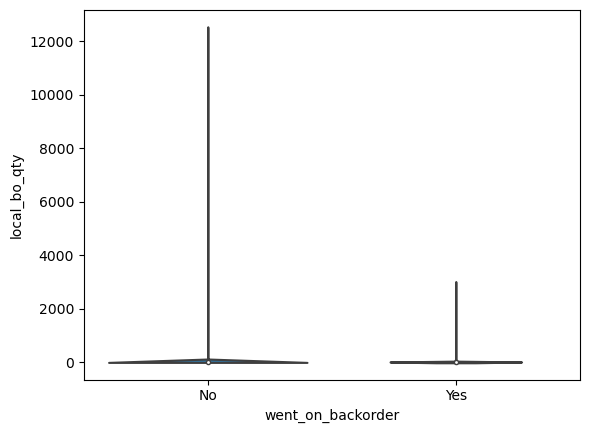

In [58]:
range_local_bo_qty = (df.local_bo_qty >= lower_bound) & (df.local_bo_qty <= upper_bound)
sns.violinplot(x=df['went_on_backorder'],y = df['local_bo_qty'],data = df.loc[range_local_bo_qty])

In [59]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.local_bo_qty.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.local_bo_qty.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  0.0
70 percentile of values is  0.0
80 percentile of values is  0.0
90 percentile of values is  0.0
100 percentile of values is  12530.0
Between 90-100 percentile
90 percentile of values is  0.0
91 percentile of values is  0.0
92 percentile of values is  0.0
93 percentile of values is  0.0
94 percentile of values is  0.0
95 percentile of values is  0.0
96 percentile of values is  0.0
97 percentile of values is  0.0
98 percentile of values is  0.0
99 percentile of values is  1.0
100 percentile of values is  12530.0


## Correlation Matrix

<Axes: >

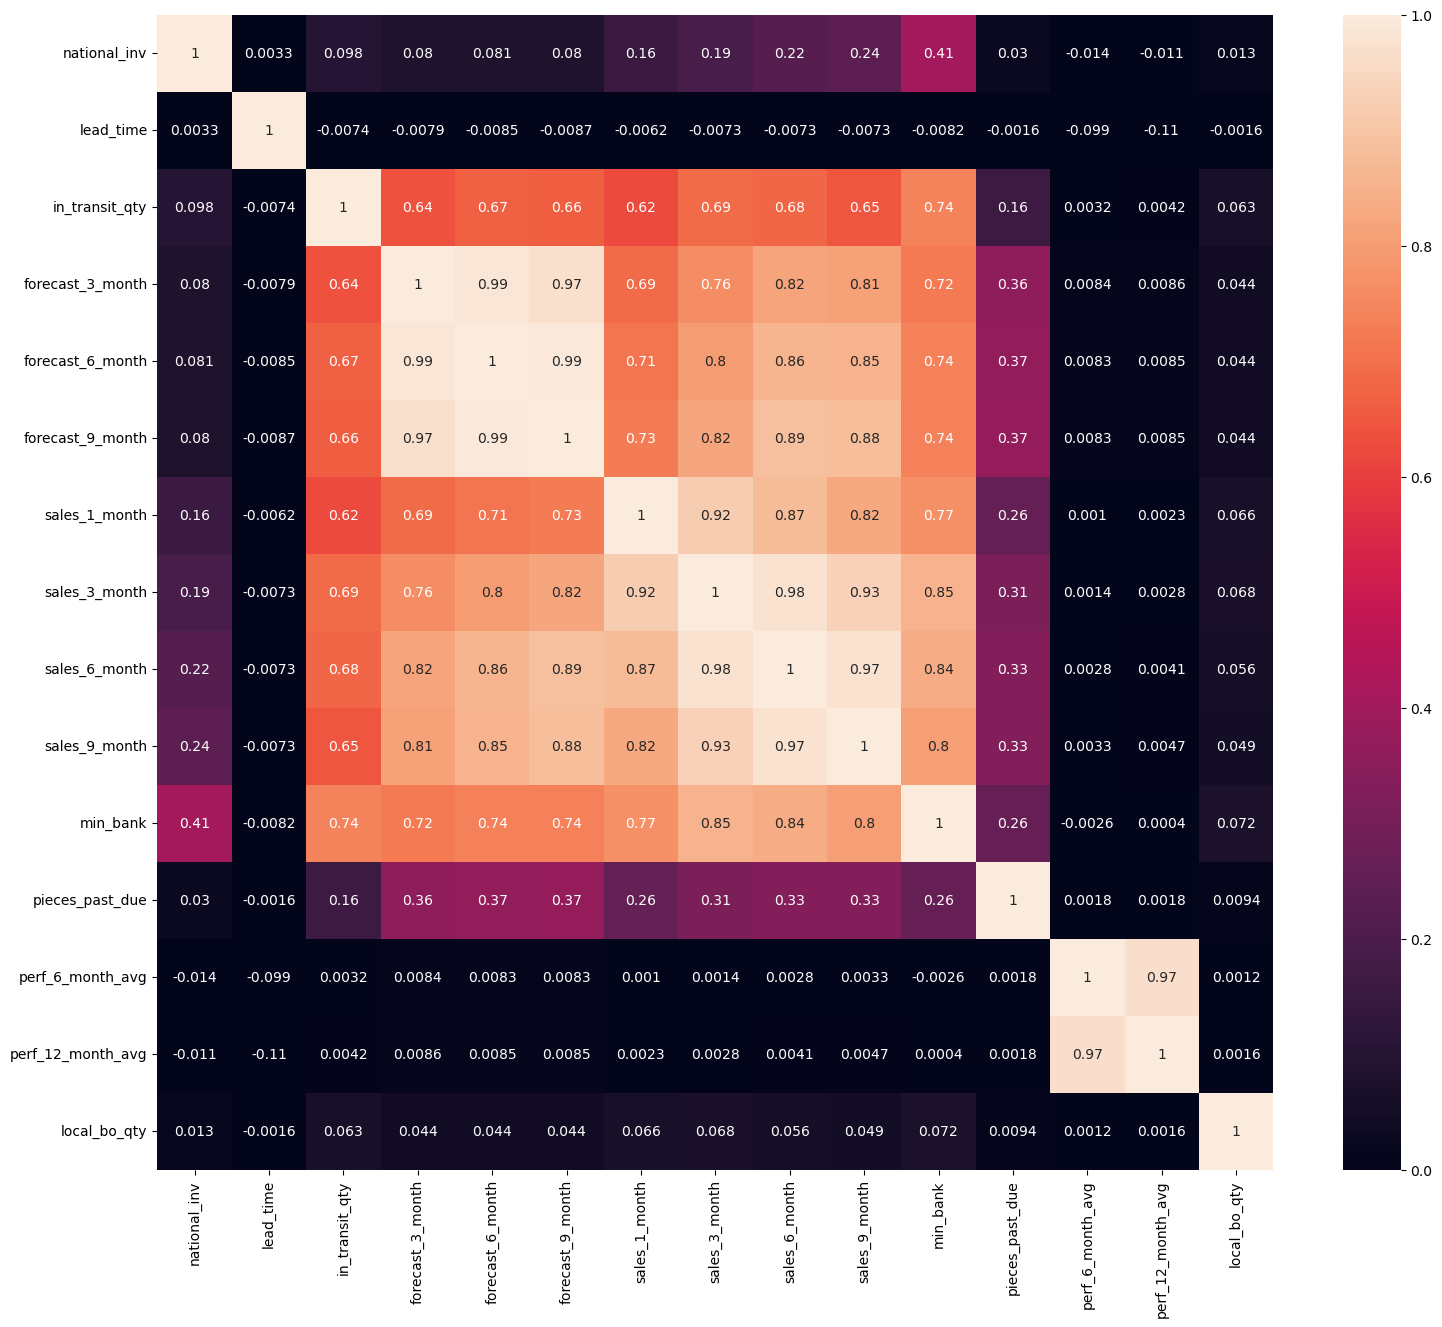

In [60]:
plt.figure(figsize = (18,15))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), vmin=0, vmax=1, annot=True)

# Finding Correlation between 2 Categorical Features

## Chi Square Test
The Chi Sqaure test statistical hypothesis is a test for checking Independence between the two categorical variables. The aim is to conclude whether the given two variables are related to each other.

#### Null Hypothesis : There is no correlation between the Categorical feature and target variable.

#### Alternate Hypothesis : There is a correlation between the Categorical feature and target variable.

We can verify the hypothesis using p-value.

Significance factor will help us determine whether the given two features have considerable significance. Significance factor is also called as Alpha value. Usually, alpha value of 0.05 is chosen. If the p-value is strictly greater than alpha value , then H0 ie Null Hypothesis holds true.

In [61]:
categorical_columns = ['rev_stop','stop_auto_buy','ppap_risk','oe_constraint','deck_risk','potential_issue']
target_variable="went_on_backorder"

In [62]:
from scipy.stats import chi2_contingency
for cat in categorical_columns:
    table = pd.crosstab(df['went_on_backorder'],df[cat])
    stats,p,dof,expected = chi2_contingency(table)
    alpha=0.05
    print("p-value is "+str(p))
    if p <= alpha:
        print("There is correlation between "+target_variable+" and "+cat+". Reject the Null Hypothesis H0")
    else:
        print("There is no correlation between "+target_variable+" and "+cat+". Accept the Null Hypothesis H0")

p-value is 0.5205331495379879
There is no correlation between went_on_backorder and rev_stop. Accept the Null Hypothesis H0
p-value is 0.0026469314858122623
There is correlation between went_on_backorder and stop_auto_buy. Reject the Null Hypothesis H0
p-value is 3.0994069960624216e-31
There is correlation between went_on_backorder and ppap_risk. Reject the Null Hypothesis H0
p-value is 1.0521651295231445e-05
There is correlation between went_on_backorder and oe_constraint. Reject the Null Hypothesis H0
p-value is 5.933788521669091e-71
There is correlation between went_on_backorder and deck_risk. Reject the Null Hypothesis H0
p-value is 1.204865270976099e-67
There is correlation between went_on_backorder and potential_issue. Reject the Null Hypothesis H0


## Finding Correlation between Categorical and Numerical Feature using Point Biserial Correlation

The Point Biserial Correlation is used to measure the correlation between a Categorical Variable(Binary Category) and Continous Variable

The Correlation coeffecients varies between -1 to +1 with 0 implying No Correlation.

#### Null Hypothesis : There is no correlation between the two features.Features.

#### Alternate Hypothesis : There is a correlation between the two features.

We can verify the hypothesis using p-value.

In [63]:
# copy the dataframe into another variable to work on correlation
copy_df = df.copy()

In [64]:
#convert Categories Yes and No to 0s and 1s
copy_df['went_on_backorder'].replace({'Yes':1,'No':0},inplace=True)
copy_df['went_on_backorder']=copy_df['went_on_backorder'].astype(int)

In [65]:
numerical_features = ['national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty']

In [66]:
#filling the Nan values using median imputation to find correlation
medianValue = copy_df['lead_time'].median()
copy_df['lead_time'] = copy_df['lead_time'].fillna(medianValue)

In [67]:
from scipy.stats import pointbiserialr

alpha = 0.05
for num in numerical_features:
    correlation_coefficient, p_value = pointbiserialr(copy_df['went_on_backorder'], copy_df[num])
    
    if p_value < alpha:
        print(f"p-value = {p_value}. There is a correlation between {target_variable} and {num}. Reject Null Hypothesis H0")
    else:
        print(f"p-value = {p_value}. There is No correlation between {target_variable} and {num}. Accept Null Hypothesis H0")


p-value = 0.05648360713045877. There is No correlation between went_on_backorder and national_inv. Accept Null Hypothesis H0
p-value = 3.7681637258308904e-146. There is a correlation between went_on_backorder and lead_time. Reject Null Hypothesis H0
p-value = 0.0004444921251505423. There is a correlation between went_on_backorder and in_transit_qty. Reject Null Hypothesis H0
p-value = 0.931819702882424. There is No correlation between went_on_backorder and forecast_3_month. Accept Null Hypothesis H0
p-value = 0.4005465152230808. There is No correlation between went_on_backorder and forecast_6_month. Accept Null Hypothesis H0
p-value = 0.2429511148558122. There is No correlation between went_on_backorder and forecast_9_month. Accept Null Hypothesis H0
p-value = 0.10420189791809266. There is No correlation between went_on_backorder and sales_1_month. Accept Null Hypothesis H0
p-value = 0.03896043751179851. There is a correlation between went_on_backorder and sales_3_month. Reject Null Hy

# Data Preprocessing

### Converting Target Variable to 0 and 1

In [68]:
#Converting Target Variable to 0 and 1
df['went_on_backorder'].replace({'Yes':1,'No':0},inplace=True)
df['went_on_backorder'].astype(int)

0          0
1          0
2          0
3          0
4          0
          ..
1929930    0
1929931    0
1929932    0
1929933    0
1929934    0
Name: went_on_backorder, Length: 1929935, dtype: int32

### Check for Number of 0s in Numerical Features and drop columns if 0s are more than 95%.

In [69]:
# Drop Columns if 95% values are 0
zero_columns = []
for col in df.columns:
    if col!='went_on_backorder' and col!='sku':
        value = df[col].value_counts()
        if 0 in value:
            if value[0] >= (0.95*df.shape[0]):
                zero_columns.append(col)
                print(col,"-> percentage of zeros : ",(value[0]*100/df.shape[0]),"%")

pieces_past_due -> percentage of zeros :  98.53347392528764 %
local_bo_qty -> percentage of zeros :  98.64223406487783 %


In [70]:
df = df.drop(columns=zero_columns,axis=1)

### Replacing -99 by Nan in performance column

In [71]:
# replacing -99 by Nan in performance column
df.perf_6_month_avg.replace({-99.0 : np.nan},inplace=True)
df.perf_12_month_avg.replace({-99.0 : np.nan},inplace=True)

### Converting Categorical Features

In [72]:
categorical_columns = ['rev_stop','stop_auto_buy','ppap_risk','oe_constraint','deck_risk','potential_issue']
for col in categorical_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)
    df[col]=df[col].astype(int)

### Removing Outlier Datapoints from DataFrame

In [73]:
old_shape = df.shape[0]

In [74]:
df = df[(df.national_inv >= 0.000) & (df.national_inv <= 5487.000) & (df.in_transit_qty <= 5510.000 )   &\
  (df.forecast_3_month <= 2280.000) & (df.forecast_6_month <= 4335.659999999916) &\
  (df.forecast_9_month <= 6316.000) & (df.sales_1_month <= 693.000) & (df.sales_3_month <= 2229.000) &\
  (df.sales_6_month <= 4410.000) & (df.sales_9_month <= 6698.000) & (df.min_bank <= 679.6599999999162)]

In [75]:
new_shape = df.shape[0]

In [76]:
print("Number of Outliers removed : ",old_shape-new_shape)

Number of Outliers removed :  48564


In [77]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0,0,0,1,0,0
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.99,0.99,0,0,0,1,0,0
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,1,0,0,1,0,0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,0.10,0.13,0,0,0,1,0,0
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0,NaN,NaN,1,0,0,1,0,0


In [78]:
columns_to_drop = ['lead_time','potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'perf_6_month_avg','perf_12_month_avg']
df.drop(columns_to_drop, axis=1, inplace=True)

In [79]:
df.head()

,sku,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,went_on_backorder
0,1026827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1043384,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1043696,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1043852,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,1044048,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0


## Train Test Split

In [80]:
# Assigning the Target Variable Column to y_true variable and droping it from the DF
y_true = df['went_on_backorder']

In [81]:
df = df.drop(['sku','went_on_backorder'],axis=1)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y_true, stratify=y_true, test_size=0.2, random_state=42)

In [83]:
x_train.head()

,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank
58660,2.0,0.0,1.0,2.0,3.0,0.0,1.0,2.0,2.0,0.0
325255,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22445,25.0,0.0,34.0,34.0,68.0,16.0,35.0,61.0,111.0,0.0
1616927,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1070785,427.0,146.0,390.0,1170.0,1820.0,92.0,282.0,738.0,966.0,156.0


In [84]:
x_test.head()

,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank
714431,2.0,0.0,2.0,4.0,6.0,0.0,2.0,2.0,5.0,0.0
1052708,7.0,0.0,0.0,0.0,0.0,1.0,1.0,11.0,16.0,1.0
1744221,5.0,0.0,0.0,0.0,1.0,4.0,10.0,13.0,16.0,2.0
921922,16.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,7.0,0.0
1736801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
y_train.head()

58660      0
325255     0
22445      0
1616927    0
1070785    0
Name: went_on_backorder, dtype: int64

In [86]:
y_test.head()

714431     0
1052708    0
1744221    0
921922     0
1736801    0
Name: went_on_backorder, dtype: int64

In [87]:
# fillna using median
median_values = x_train.median()

x_train_median = x_train.fillna(median_values)

x_test_median = x_test.fillna(median_values)

print(x_train_median.shape,x_test_median.shape)

(1505096, 10) (376275, 10)


# LOGISTIC REGRESSION

In [88]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error

In [89]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [90]:
lr=LogisticRegression()
lr.fit(x_train_median,y_train)

LogisticRegression()

In [91]:
y_pred=lr.predict(x_test_median)

In [92]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.018698578908002993


In [93]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0069736230150820545


In [94]:
accuracy_score(y_test, y_pred)*100

99.3026376984918

In [95]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[373626     90]
 [  2534     25]]


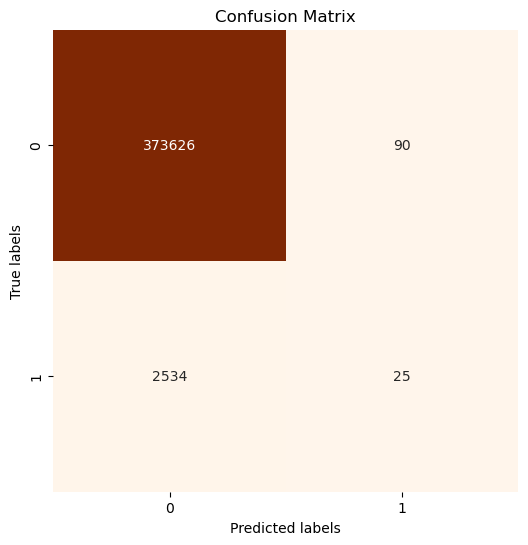

In [96]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

## RANDOM FOREST

In [97]:
rf=RandomForestClassifier()
rf.fit(x_train_median,y_train)

RandomForestClassifier()

In [98]:
y_predict=rf.predict(x_test_median)

In [99]:
f1 = f1_score(y_test, y_predict)
print("F1 Score:", f1)

F1 Score: 0.255278310940499


In [100]:
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.006186964321307554


In [101]:
accuracy_score(y_test, y_predict)*100

99.38130356786924

In [102]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[373548    168]
 [  2160    399]]


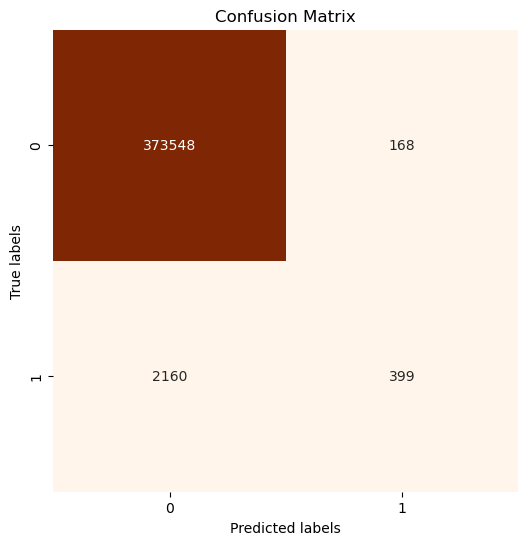

In [103]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [104]:
from prettytable import PrettyTable

In [108]:
table=PrettyTable()
table.field_names=['MODEL','PARAMETERS','F1 SCORE']
table.add_row(['Logistic Regression','F1_score ,confusion matrix','0.018'])
table.add_row(['Random Forest Classifier','F1_score,confusion matrix','0.255'])

In [109]:
print(table)

+--------------------------+----------------------------+----------+
|          MODEL           |         PARAMETERS         | F1 SCORE |
+--------------------------+----------------------------+----------+
|   Logistic Regression    | F1_score ,confusion matrix |  0.018   |
| Random Forest Classifier | F1_score,confusion matrix  |  0.255   |
+--------------------------+----------------------------+----------+


In [107]:
print("As conclusion random forest classifier is better appraoch")

As conclusion random forest classifier is better appraoch
